<a href="https://colab.research.google.com/github/rajan5639/Machine_learning/blob/main/Knn_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# K-Nearest Neighbors (KNN) and PCA Combined Assignment

# 1. KNN Classifier on Iris Dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, predictions))

Model Accuracy: 1.0


In [ ]:
# 2. KNN Regressor on Synthetic Dataset
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)
preds = reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, preds))


Mean Squared Error: 275.9503187423206


In [ ]:
## 3. KNN with Different Distance Metrics
# Reload the iris dataset and split it into training and testing sets
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Now proceed with creating and fitting the models
model_euclidean = KNeighborsClassifier(metric='euclidean')
model_manhattan = KNeighborsClassifier(metric='manhattan')
model_euclidean.fit(X_train, y_train)
model_manhattan.fit(X_train, y_train)
print("Euclidean Accuracy:", model_euclidean.score(X_test, y_test))
print("Manhattan Accuracy:", model_manhattan.score(X_test, y_test))

Euclidean Accuracy: 1.0
Manhattan Accuracy: 1.0


In [ ]:
## 4. KNN Classifier with Different K values
import matplotlib.pyplot as plt
import numpy as np

k_range = range(1, 11)
accuracies = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))
plt.plot(k_range, accuracies)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K Value')
plt.grid(True)
plt.show()


Euclidean Accuracy: 1.0
Manhattan Accuracy: 1.0


In [ ]:
# 5. Feature Scaling and KNN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_scaled = KNeighborsClassifier()
model_scaled.fit(X_train_scaled, y_train)
print("Accuracy after Scaling:", model_scaled.score(X_test_scaled, y_test))


Accuracy after Scaling: 1.0


In [ ]:

# 6. PCA on Synthetic Data
from sklearn.decomposition import PCA

# 6. PCA on Synthetic Data
from sklearn.decomposition import PCA

X, _ = make_regression(n_samples=100, n_features=5, noise=5)
pca = PCA()
pca.fit(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.26386377 0.23607845 0.19672802 0.15348595 0.14984381]


In [ ]:
# 7. PCA + KNN Classifier Accuracy Comparison
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)
model_pca = KNeighborsClassifier()
model_pca.fit(X_pca_train, y_train)
print("KNN Accuracy with PCA:", model_pca.score(X_pca_test, y_test))


KNN Accuracy with PCA: 0.9333333333333333


In [ ]:
# 8. Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}


Number of Misclassified Samples: 0


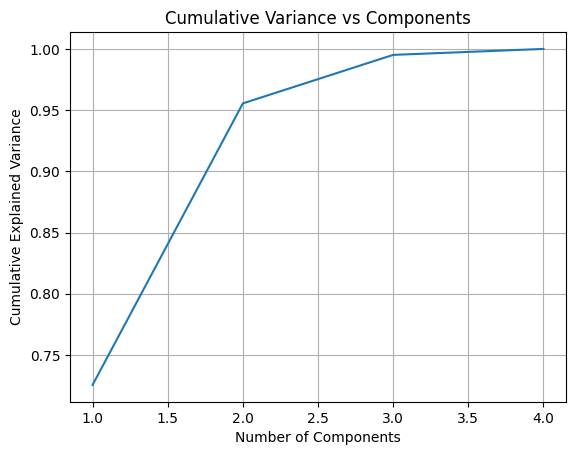

In [ ]:
# 9. Misclassified Samples
misclassified = (predictions != y_test).sum()
print("Number of Misclassified Samples:", misclassified)




# 10. PCA Cumulative Explained Variance
pca_full = PCA().fit(X_train_scaled)
cumulative = np.cumsum(pca_full.explained_variance_ratio_)
plt.plot(range(1, len(cumulative)+1), cumulative)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance vs Components')
plt.grid(True)
plt.show()

#**Question 10-20**

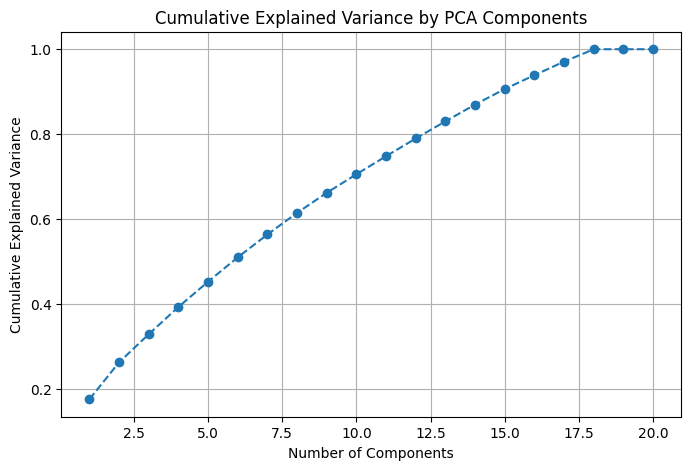

Uniform Weights Accuracy: 1.0
Distance Weights Accuracy: 1.0


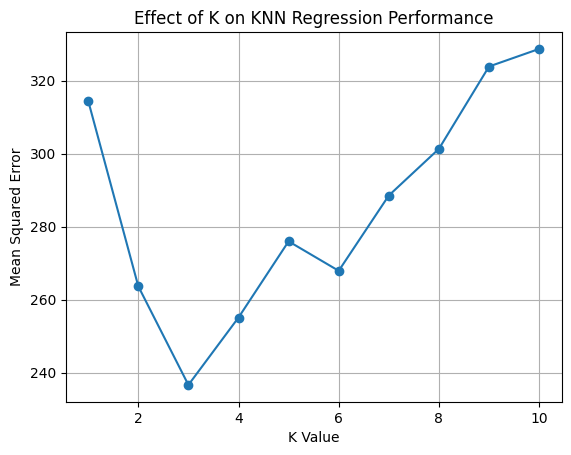

Imputed Data:
 [[1. 2.]
 [3. 4.]
 [7. 6.]
 [4. 5.]]


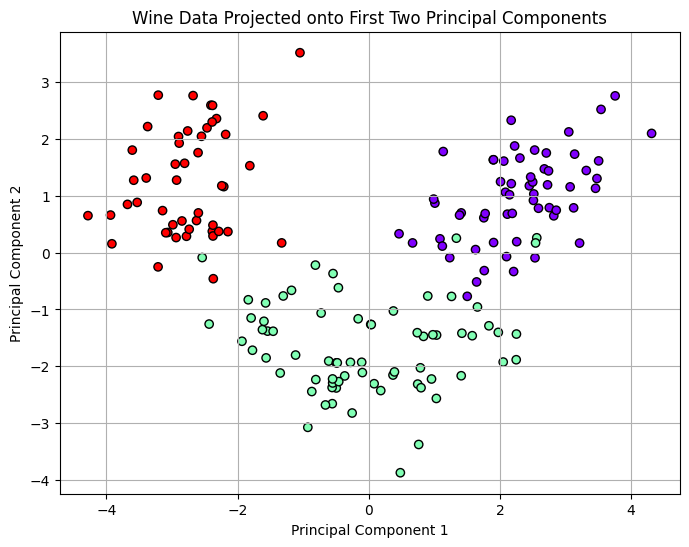

KD Tree Accuracy: 1.0
Ball Tree Accuracy: 1.0


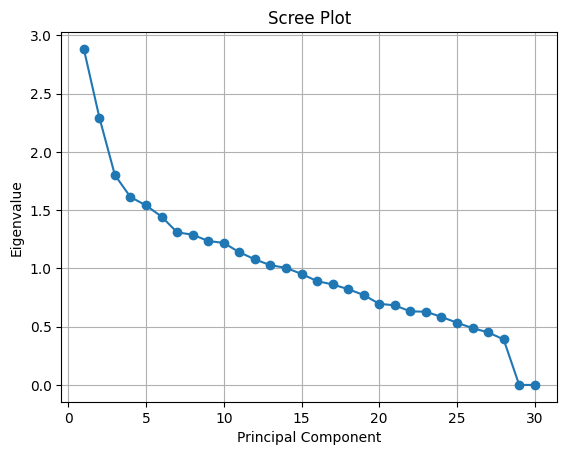

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



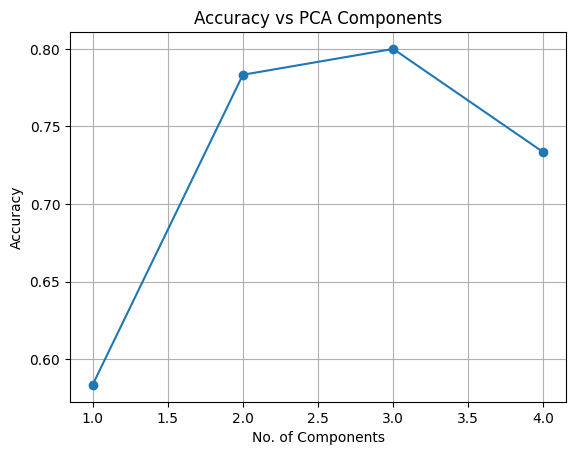

Leaf Size: 10 -> Accuracy: 0.80
Leaf Size: 20 -> Accuracy: 0.80
Leaf Size: 30 -> Accuracy: 0.80
Leaf Size: 40 -> Accuracy: 0.80
Leaf Size: 50 -> Accuracy: 0.80


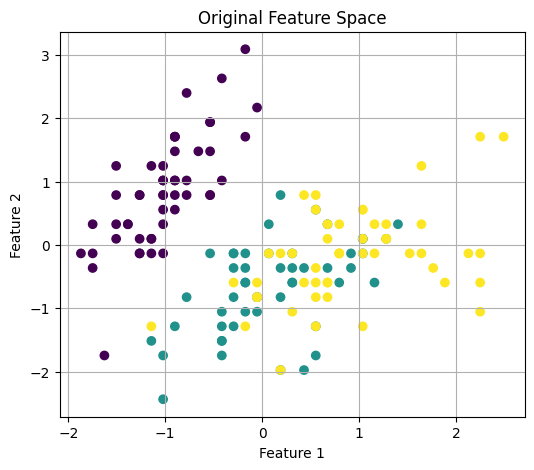

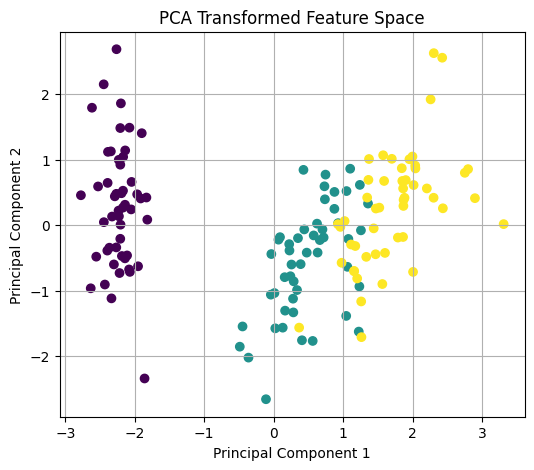

In [ ]:
### Practical 10: Train a PCA model and visualize the cumulative explained variance

from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic high-dimensional data
X, _ = make_classification(n_samples=300, n_features=20, random_state=42)

# Train PCA model
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


### Practical 11: Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Uniform weights
knn_uniform = KNeighborsClassifier(weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)

# Distance weights
knn_distance = KNeighborsClassifier(weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)

print("Uniform Weights Accuracy:", accuracy_score(y_test, y_pred_uniform))
print("Distance Weights Accuracy:", accuracy_score(y_test, y_pred_distance))


### Practical 12: Train a KNN Regressor and analyze the effect of different K values on performance

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate regression data
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

errors = []
k_values = range(1, 11)

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred))

plt.plot(k_values, errors, marker='o')
plt.title('Effect of K on KNN Regression Performance')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


### Practical 13: Implement KNN Imputation for handling missing values in a dataset

from sklearn.impute import KNNImputer
import numpy as np

# Create data with missing values
X = np.array([[1, 2], [3, np.nan], [7, 6], [np.nan, 5]])

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X)

print("Imputed Data:\n", X_imputed)


### Practical 14: Train a PCA model and visualize the data projection onto the first two principal components

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load Wine dataset
data = load_wine()
X = StandardScaler().fit_transform(data.data)
y = data.target

# PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wine Data Projected onto First Two Principal Components')
plt.grid(True)
plt.show()


### Practical 15: Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KD Tree
knn_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_kd.fit(X_train, y_train)
y_pred_kd = knn_kd.predict(X_test)

# Ball Tree
knn_ball = KNeighborsClassifier(algorithm='ball_tree')
knn_ball.fit(X_train, y_train)
y_pred_ball = knn_ball.predict(X_test)

print("KD Tree Accuracy:", accuracy_score(y_test, y_pred_kd))
print("Ball Tree Accuracy:", accuracy_score(y_test, y_pred_ball))


### Practical 16: Train a PCA model on a high-dimensional dataset and visualize the Scree plot

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# High-dimensional data
X, _ = make_classification(n_samples=200, n_features=30, random_state=42)

pca = PCA()
pca.fit(X)

plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()


### Practical 17: Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))


### Practical 18: Train a PCA model and analyze the effect of different numbers of components on accuracy

from sklearn.datasets import make_classification  # Assuming you're using the make_classification dataset
from sklearn.model_selection import train_test_split

# ... (other imports)

components = [1, 2, 3, 4]
accuracies = []

# Redefine or reload your dataset and perform the train-test split
X, y = make_classification(n_samples=200, n_features=30, random_state=42) # Or use your desired dataset loading method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)  # Fit and transform on training data
    X_test_pca = pca.transform(X_test)  # Transform test data using the fitted PCA
    knn = KNeighborsClassifier()
    knn.fit(X_train_pca, y_train)
    acc = knn.score(X_test_pca, y_test)
    accuracies.append(acc)

plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs PCA Components')
plt.xlabel('No. of Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


### Practical 19: Train a KNN Classifier with different leaf_size values and compare accuracy

leaf_sizes = [10, 20, 30, 40, 50]
for leaf in leaf_sizes:
    knn = KNeighborsClassifier(leaf_size=leaf)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    print(f"Leaf Size: {leaf} -> Accuracy: {acc:.2f}")


### Practical 20: Train a PCA model and visualize how data points are transformed before and after PCA

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Before PCA - original features
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
plt.title('Original Feature Space')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# After PCA - transformed features
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Transformed Feature Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



#**Question 21 to 30**

Accuracy with uniform weights: 1.0
Accuracy with distance weights: 1.0
MSE for k=1: 0.125
MSE for k=2: 0.09375
MSE for k=3: 0.09444444444444446
MSE for k=4: 0.1125
MSE for k=5: 0.10600000000000001
Missing values imputed using KNN


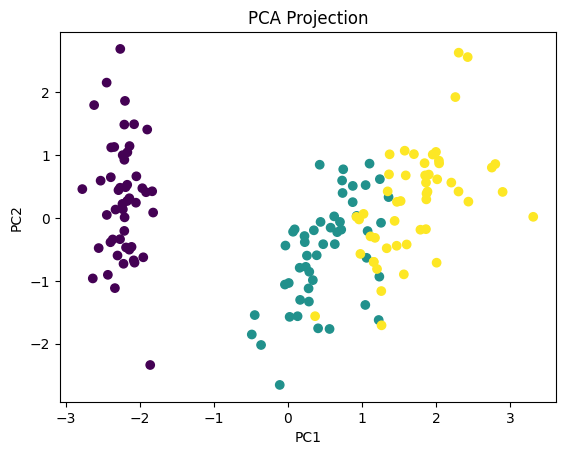

Accuracy with kd_tree: 0.8
Accuracy with ball_tree: 0.8


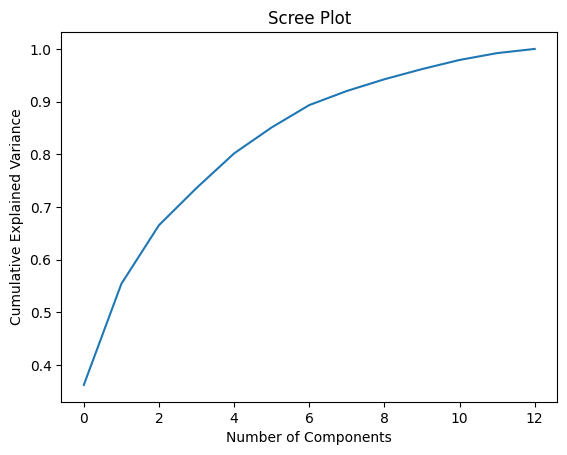

Precision: 0.8131868131868132
Recall: 0.7878787878787878
F1 Score: 0.7916666666666667
Accuracy with 1 components: 0.9111111111111111
Accuracy with 2 components: 0.9555555555555556
Accuracy with 3 components: 1.0
Accuracy with 4 components: 1.0
Leaf Size: 10 -> Accuracy: 1.00
Leaf Size: 30 -> Accuracy: 1.00
Leaf Size: 50 -> Accuracy: 1.00


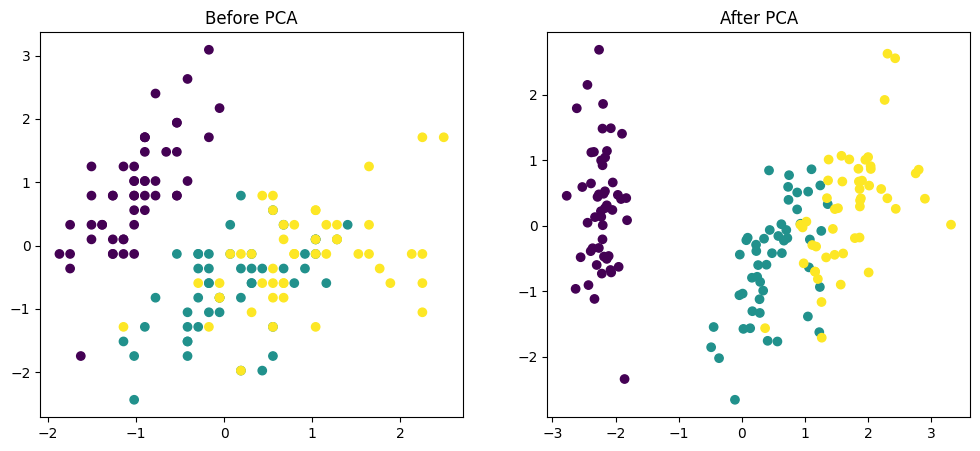

In [ ]:
from sklearn.datasets import make_classification, load_iris, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 21. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

for weight in ['uniform', 'distance']:
    knn = KNeighborsClassifier(weights=weight)
    knn.fit(X_train, y_train)
    print(f"Accuracy with {weight} weights:", knn.score(X_test, y_test))

# 22. Train a KNN Regressor and analyze the effect of different K values on performance
X, y = make_classification(n_samples=200, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for k in range(1, 6):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    print(f"MSE for k={k}:", mean_squared_error(y_test, y_pred))

# 23. Implement KNN Imputation for handling missing values in a dataset
X = iris.data.copy()
X[0:10, 0] = np.nan
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X)
print("Missing values imputed using KNN")

# 24. Train a PCA model and visualize the data projection onto the first two principal components
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 25. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance
for algorithm in ['kd_tree', 'ball_tree']:
    knn = KNeighborsClassifier(algorithm=algorithm)
    knn.fit(X_train, y_train)
    print(f"Accuracy with {algorithm}:", knn.score(X_test, y_test))

# 26. Train a PCA model on a high-dimensional dataset and visualize the Scree plot
wine = load_wine()
X_scaled = scaler.fit_transform(wine.data)
pca = PCA()
pca.fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# 27. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

# 28. Train a PCA model and analyze the effect of different numbers of components on accuracy
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier


# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for n in range(1, 5):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier()
    knn.fit(X_train_pca, y_train)
    print(f"Accuracy with {n} components:", knn.score(X_test_pca, y_test))

# 29. Train a KNN Classifier with different leaf_size values and compare accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset (or your desired dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

leaf_sizes = [10, 30, 50]
for leaf in leaf_sizes:
    knn = KNeighborsClassifier(leaf_size=leaf)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    print(f"Leaf Size: {leaf} -> Accuracy: {acc:.2f}")

# 30. Train a PCA model and visualize how data points are transformed before and after PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=iris.target)
plt.title("Before PCA")
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.title("After PCA")
plt.show()


# **Question 31 - 37**

Uniform Accuracy: 1.0
Distance-based Accuracy: 1.0
K=1, MSE=566.25
K=3, MSE=397.60
K=5, MSE=437.35
K=7, MSE=442.66
K=9, MSE=472.74
[[1. 2.]
 [3. 4.]
 [7. 6.]
 [4. 5.]]


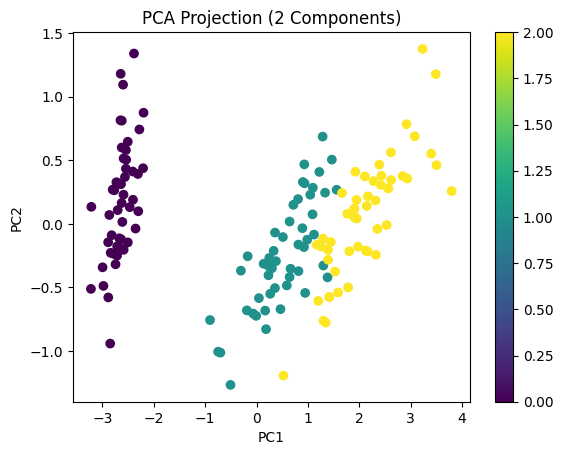

KD Tree Accuracy: 1.0
Ball Tree Accuracy: 1.0


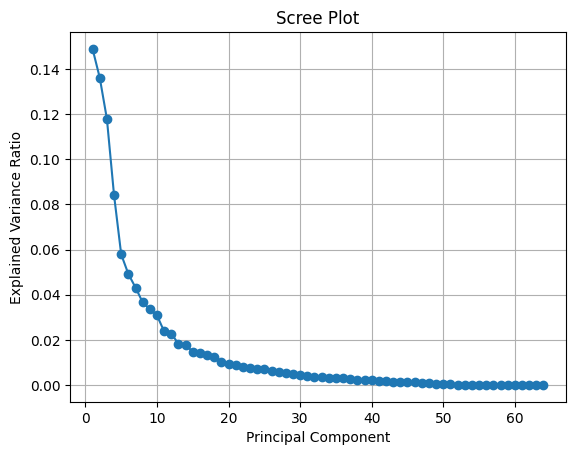

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

PCA Components = 1, Accuracy = 1.00
PCA Components = 2, Accuracy = 1.00
PCA Components = 3, Accuracy = 1.00
PCA Components = 4, Accuracy = 1.00
Leaf Size = 10, Accuracy = 1.00
Leaf Size = 20, Accuracy = 1.00
Leaf Size = 30, Accuracy = 1.00
Leaf Size = 40, Accuracy = 1.00
Leaf Size = 50, Accuracy = 1.00


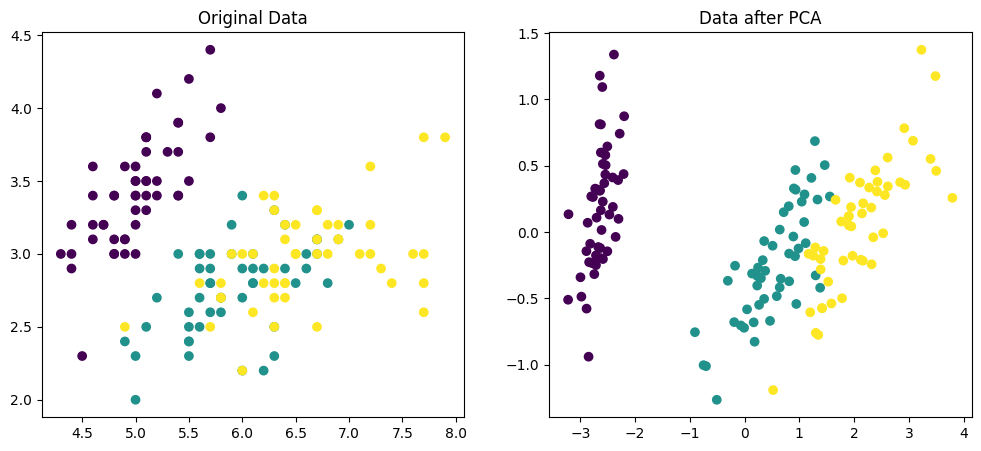

In [ ]:
#31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

uniform_model = KNeighborsClassifier(weights='uniform')
uniform_model.fit(X_train, y_train)
uniform_acc = accuracy_score(y_test, uniform_model.predict(X_test))

weighted_model = KNeighborsClassifier(weights='distance')
weighted_model.fit(X_train, y_train)
weighted_acc = accuracy_score(y_test, weighted_model.predict(X_test))

print("Uniform Accuracy:", uniform_acc)
print("Distance-based Accuracy:", weighted_acc)





#32. Train a KNN Regressor and analyze the effect of different K values on performance


from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for k in [1, 3, 5, 7, 9]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"K={k}, MSE={mse:.2f}")


#33. Implement KNN Imputation for handling missing values in a dataset


from sklearn.impute import KNNImputer
import numpy as np

X = np.array([[1, 2], [3, np.nan], [7, 6], [np.nan, 5]])
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X)
print(X_imputed)


#34. Train a PCA model and visualize the data projection onto the first two principal components


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection (2 Components)')
plt.colorbar()
plt.show()


#35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset (or your desired dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you can proceed with training and evaluating the models
kd_model = KNeighborsClassifier(algorithm='kd_tree')
kd_model.fit(X_train, y_train)
kdtree_acc = accuracy_score(y_test, kd_model.predict(X_test))

ball_model = KNeighborsClassifier(algorithm='ball_tree')
ball_model.fit(X_train, y_train)
balltree_acc = accuracy_score(y_test, ball_model.predict(X_test))

print("KD Tree Accuracy:", kdtree_acc)
print("Ball Tree Accuracy:", balltree_acc)


#36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot


from sklearn.datasets import load_digits

digits = load_digits()
pca = PCA()
pca.fit(digits.data)

plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()



#37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score


from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


#38. Train a PCA model and analyze the effect of different numbers of components on accuracy


for n in [1, 2, 3, 4]:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(iris.data)
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, iris.target, test_size=0.2, random_state=42)
    model = KNeighborsClassifier()
    model.fit(X_train_pca, y_train)
    acc = accuracy_score(y_test, model.predict(X_test_pca))
    print(f"PCA Components = {n}, Accuracy = {acc:.2f}")


#39. Train a KNN Classifier with different leaf_size values and compare accuracy


from sklearn.datasets import load_iris  # Or use your desired dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset (or your desired dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now proceed with training and evaluating the models
for leaf in [10, 20, 30, 40, 50]:
    model = KNeighborsClassifier(leaf_size=leaf)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Leaf Size = {leaf}, Accuracy = {acc:.2f}")


#40. Train a PCA model and visualize how data points are transformed before and after PCA


X_original = iris.data
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X_original)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_original[:, 0], X_original[:, 1], c=iris.target)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=iris.target)
plt.title('Data after PCA')

plt.show()


Algorithm: brute, Accuracy: 1.00, Time: 0.0044 sec
Algorithm: kd_tree, Accuracy: 1.00, Time: 0.0096 sec
Algorithm: ball_tree, Accuracy: 1.00, Time: 0.0087 sec


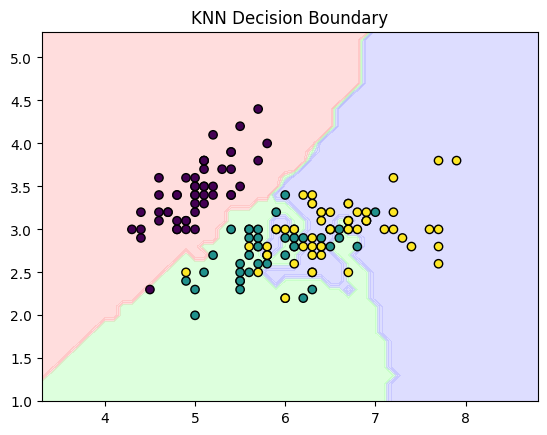

Best Params: {'n_neighbors': 7, 'weights': 'uniform'}
Best Score: 0.9523809523809523
Logistic Regression Accuracy (PCA-reduced): 1.00


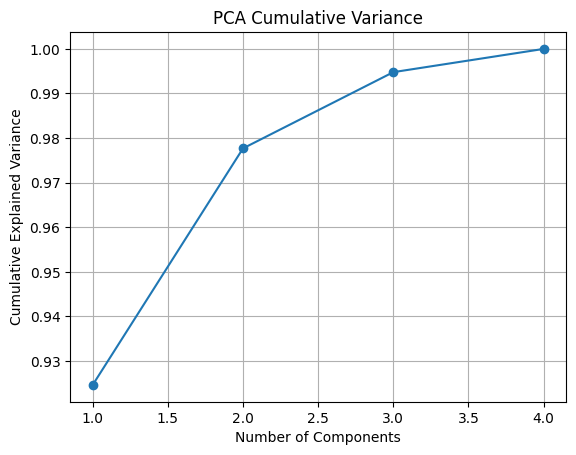

Original Shape: (150, 4)
Reconstructed Shape: (150, 4)
Accuracy on Noisy Data: 0.7777777777777778


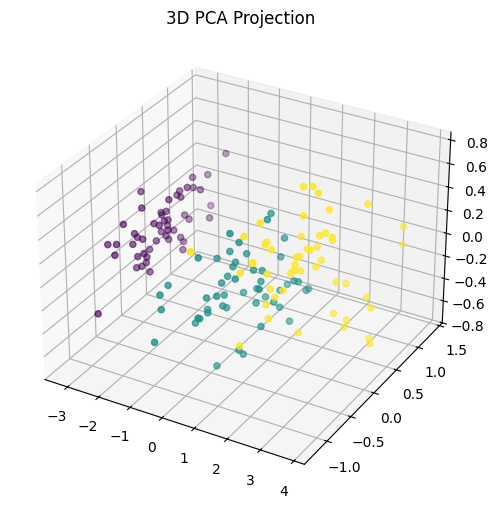

In [ ]:
#41. Compare execution time of KNN with brute-force vs. KD-Tree vs. Ball-Tree


import time

for algo in ['brute', 'kd_tree', 'ball_tree']:
    model = KNeighborsClassifier(algorithm=algo)
    start = time.time()
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    end = time.time()
    print(f"Algorithm: {algo}, Accuracy: {acc:.2f}, Time: {end - start:.4f} sec")


#42. Visualize decision boundaries of a KNN Classifier (2D data only)


from matplotlib.colors import ListedColormap
import numpy as np

X_2d = iris.data[:, :2]
y_2d = iris.target
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_2d, y_2d)

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, edgecolor='k')
plt.title("KNN Decision Boundary")
plt.show()

#43. Train a KNN model and tune hyperparameters using GridSearchCV


from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

# 44. Use PCA to reduce dimensions and then train Logistic Regression


from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(iris.data)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_reduced, iris.target, test_size=0.2, random_state=42)

lr_model = LogisticRegression()
lr_model.fit(X_train_pca, y_train)
acc = accuracy_score(y_test, lr_model.predict(X_test_pca))
print(f"Logistic Regression Accuracy (PCA-reduced): {acc:.2f}")


# 45. Plot cumulative explained variance to decide how many PCA components to keep


pca = PCA().fit(iris.data)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Variance")
plt.grid(True)
plt.show()


#46. Apply PCA and reconstruct the original data from reduced components


pca = PCA(n_components=2)
X_reduced = pca.fit_transform(iris.data)
X_reconstructed = pca.inverse_transform(X_reduced)

print("Original Shape:", iris.data.shape)
print("Reconstructed Shape:", X_reconstructed.shape)


#47. Use KNN to classify noisy data and observe robustness


from sklearn.datasets import make_classification

X_noise, y_noise = make_classification(n_samples=300, n_features=5, n_informative=3, n_redundant=2, flip_y=0.2, random_state=42)
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise, y_noise, test_size=0.3, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train_noise, y_train_noise)
acc = accuracy_score(y_test_noise, model.predict(X_test_noise))
print("Accuracy on Noisy Data:", acc)


#48. Apply PCA and visualize 3D projection using the first three components


from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_3d = pca.fit_transform(iris.data)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=iris.target, cmap='viridis')
ax.set_title("3D PCA Projection")
plt.show()